In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
page=requests.get("https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city",headers = {'User-Agent':'Mozilla/5.0'})

In [3]:
page

<Response [200]>

In [4]:
page.text

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>Property for Sale in Hyderabad | 52069+ Hyderabad Properties for sale</title><meta name="description" content="Search 52069+ Properties for sale in Hyderabad on Makaan.com. Find &#10003;8769+ New Projects for sale. &#10003;20523+ Flats/Apartments. &#10003;9070+ Houses/Villas. Visit Now !"><meta name="keywords" content="Buy Hyderabad Properties, Residential Property for sale in Hyderabad, Property for sale in Hyderabad, Hyderabad Property Sale"><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="country" content="India"><meta name="og:type" content="website"><meta name="og:site_name" content="Makaan.com"><meta name="og:image:url" content="http://static.makaan.com/6/12/355/11020788.jpeg"><meta name="og:ti

In [5]:
soup=BeautifulSoup(page.text)

In [6]:
soup.find_all("span",class_="val",itemprop="offers")[3].text

'2.4'

In [7]:
len(soup.find_all("span",class_="val",itemprop="offers"))

20

In [8]:
prices = []
for i in soup.find_all("span",class_="val",itemprop="offers"):
    prices.append(i.text)

In [9]:
prices

['1.68',
 '71.5',
 '2.45',
 '2.4',
 '91.77',
 '1.32',
 '1.59',
 '1.48',
 '1.62',
 '75.62',
 '1.03',
 '1.46',
 '1.28',
 '1.27',
 '3.14',
 '1.5',
 '90.63',
 '1.23',
 '1.5',
 '4.08']

In [10]:
price_per_sqr_ft = []
for i in soup.find_all("td",class_="lbl rate"):
    price_per_sqr_ft.append(i.text)

In [11]:
price_per_sqr_ft

['7,500 / sq ft',
 '5,900 / sq ft',
 '12,500 / sq ft',
 '8,750 / sq ft',
 '5,700 / sq ft',
 '4,500 / sq ft',
 '6,502 / sq ft',
 '7,400 / sq ft',
 '7,950 / sq ft',
 '5,500 / sq ft',
 '7,502 / sq ft',
 '7,299 / sq ft',
 '8,699 / sq ft',
 '6,500 / sq ft',
 '8,500 / sq ft',
 '7,800 / sq ft',
 '6,799 / sq ft',
 '6,700 / sq ft',
 '7,200 / sq ft',
 '12,000 / sq ft']

In [12]:
b=soup.find_all('a',attrs={'class':'seller-name'})


In [13]:
builder=[]
for i in b:
     builder.append(i.text)
builder   

['Jain Constructions',
 'KSR Homes India Private Limited',
 'BSCPL Infrastructure Ltd',
 'Western Constructions',
 'Nestcon Shelters Pvt Ltd',
 'Sunder Homes',
 'G K Constructions',
 'Candeur Developers And Builders',
 'Candeur Constructions Private Limited',
 'Risinia Builders',
 'Om Sree Builders Developers',
 'Shree Vasavi Developers',
 'Cyber City Oriana',
 'R V Nirmaan Private Limited',
 'Ira Reality',
 'Elemental Realty',
 'Urbanrise',
 'Anuhar Homes Pvt Ltd',
 'Theme Ambience Infrastructures',
 'APR Group']

In [14]:
len(builder)

20

In [15]:
loc=soup.find_all("span",itemprop = "addressLocality")

In [16]:
location=[]
for i in loc:
    location.append((i).text)
location

['Malkajgiri',
 'Tellapur',
 'Kondapur',
 'Nanakramguda',
 'Alwal',
 'Kompally',
 'Yapral',
 'Miyapur',
 'Kondapur',
 'Bowrampet',
 'Gundlapochampally',
 'Attapur',
 'Kukatpally',
 'Miyapur',
 'Adibatla',
 'Patancheru',
 'Miyapur',
 'Manikonda',
 'Attapur',
 'Bachupally']

In [17]:
cons_status=soup.find_all("td",class_="val")

In [18]:
building_status=[]
for i in cons_status:
    building_status.append(i.text)
building_status

['Under Construction',
 'Under Construction',
 'Ready to move',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction',
 'Under Construction']

In [19]:
flat=[]
h=[]
flat1=soup.find_all('div',class_="title-line")
for i in flat1:
    h.append(i.find("span",class_="val"))
for i in h:
        if i is None:
            flat.append(np.NaN)
        else:
            flat.append(i.text)

In [20]:
flat

['3 ',
 '2 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '2 ',
 '2 ',
 '3 ',
 '3 ',
 '3 ',
 '3 ',
 '4 ',
 '4 ',
 '2 ',
 '3 ',
 '3 ',
 '4 ']

In [21]:
area=[]
for i in soup.find_all('td',class_='size'):
    area.append(i.text)
area

['2245 ',
 '1212 ',
 '1965 ',
 '2745 ',
 '1610 ',
 '2951 ',
 '2457 ',
 '2004 ',
 '2038 ',
 '1375 ',
 '1376 ',
 '2005 ',
 '1480 ',
 '1967 ',
 '3705 ',
 '1930 ',
 '1333 ',
 '1840 ',
 '2090 ',
 '3400 ']

In [22]:
prices = []
price_per_sqr_ft = []
area=[]
location=[]
building_status=[]
flat=[]
builder=[]


for i in range(1,100):
    a="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page="+str(i)+"&_=1691444459819"
    page=requests.get(a)
    soup=BeautifulSoup(page.text)
    
    
    for i in soup.find_all("span",class_="val",itemprop="offers"):
        prices.append(i.text)
    
    
    for i in soup.find_all("td",class_="lbl rate"):
        price_per_sqr_ft.append(i.text)
    
    b=soup.find_all('a',attrs={'class':'seller-name'})
    for i in b:
        builder.append(i.text)
        
        
    loc=soup.find_all("span",itemprop = "addressLocality")
    for i in loc:
        location.append((i).text)
        
        
    cons_status=soup.find_all("td",class_="val")
    for i in cons_status:
        building_status.append(i.text)
    
    
    h=[]
    flat1=soup.find_all('div',class_="title-line")
    for i in flat1:
        h.append(i.find("span",class_="val"))
    for i in h:
        if i is None:
            flat.append(np.NaN)
        else:
            flat.append(i.text)
            
            
    for i in soup.find_all('td',class_='size'):
        area.append(i.text)

In [23]:
len(builder)

1980

In [24]:
len(prices)

1980

In [25]:
len(area)

1980

In [26]:
len(price_per_sqr_ft)

1980

In [27]:
len(location)

1980

In [28]:
len(building_status)

1980

In [29]:
len(flat)

1980

In [30]:
data= {'Builder':builder,'BHK':flat,'Area_sqft':area,'Price_Per_sq_ft':price_per_sqr_ft,'Total_Price(in_lakhs)':prices,'Location':location,'Construction_Status':building_status}

In [31]:
data_set=pd.DataFrame(data)

In [32]:
data_copy=data_set.copy()

In [33]:
data_copy.head()

,Builder,BHK,Area_sqft,Price_Per_sq_ft,Total_Price(in_lakhs),Location,Construction_Status
0,Jain Constructions,3,2245,"7,500 / sq ft",1.68,Malkajgiri,Under Construction
1,KSR Homes India Private Limited,2,1212,"5,900 / sq ft",71.5,Tellapur,Under Construction
2,BSCPL Infrastructure Ltd,3,1965,"12,500 / sq ft",2.45,Kondapur,Ready to move
3,Western Constructions,3,2745,"8,750 / sq ft",2.4,Nanakramguda,Under Construction
4,Nestcon Shelters Pvt Ltd,3,1610,"5,700 / sq ft",91.77,Alwal,Under Construction


In [34]:
data_copy.tail()

,Builder,BHK,Area_sqft,Price_Per_sq_ft,Total_Price(in_lakhs),Location,Construction_Status
1975,Venkateswara Rentals,3,1550,"8,451 / sq ft",1.31,Nallakunta,Ready to move
1976,KIRAN AI,NaN,1503,"2,628 / sq ft",39.5,Sangareddy,New
1977,Prakash Group,NaN,3600,"1,333 / sq ft",47.98,Nandikandi,New
1978,Prakash Group,NaN,1800,"1,333 / sq ft",23.99,Nandikandi,New
1979,Prakash Group,NaN,1647,"1,333 / sq ft",21.95,Nandikandi,New


In [35]:
data_copy.to_csv('hyderabad_properties.csv')

# DATA CLEANING

In [36]:
hyd_flats = pd.read_csv(r"C:\Users\dell\Downloads\hyderabad_properties.csv")
hyd_flats

,Unnamed: 0,Builder,BHK,Area_sqft,Price_Per_sq_ft,Total_Price(in_lakhs),Location,Construction_Status
0,0,Eco Green Builders,3.0,1571,"4,200 / sq ft",65.98,Gundlapochampally,Under Construction
1,1,Elemental Realty,4.0,1930,"7,700 / sq ft",1.48,Patancheru,Under Construction
2,2,Riddhi Group,4.0,4157,"7,200 / sq ft",2.99,Tukkuguda,Under Construction
3,3,APR Group,4.0,3400,"12,000 / sq ft",4.08,Bachupally,Under Construction
4,4,Grenstone Infra,4.0,2701,"5,200 / sq ft",1.40,Maheshwaram,Under Construction
...,...,...,...,...,...,...,...,...
1975,1975,Dial To Property,NaN,2178,833 / sq ft,18.14,Yacharam,New
1976,1976,Chakravarthy realtors,NaN,9009,876 / sq ft,79.00,Pulimamidi,New
1977,1977,Chakravarthy realtors,NaN,9018,864 / sq ft,78.00,Pulimamidi,New
1978,1978,Chakravarthy realtors,NaN,1800,"4,388 / sq ft",79.00,Mokila,New


In [37]:
hyd_flats.drop('Unnamed: 0',inplace=True,axis=1)

In [38]:
# getting only the price in price_per_sqft
g=[]    
for i in range(len(hyd_flats)):
    g.append(hyd_flats['Price_Per_sq_ft'][i][:-8])
hyd_flats['Price_Per_sq_ft']=g

In [39]:
# Removing the , from the price_per_sqft column
q=[]
for i in range(len(hyd_flats)):    
    n=hyd_flats['Price_Per_sq_ft'][i].split(',')
    q.append("".join(n))
hyd_flats['Price_Per_sq_ft']=q

In [40]:
hyd_flats.head()

,Builder,BHK,Area_sqft,Price_Per_sq_ft,Total_Price(in_lakhs),Location,Construction_Status
0,Eco Green Builders,3.0,1571,4200,65.98,Gundlapochampally,Under Construction
1,Elemental Realty,4.0,1930,7700,1.48,Patancheru,Under Construction
2,Riddhi Group,4.0,4157,7200,2.99,Tukkuguda,Under Construction
3,APR Group,4.0,3400,12000,4.08,Bachupally,Under Construction
4,Grenstone Infra,4.0,2701,5200,1.40,Maheshwaram,Under Construction


In [41]:
hyd_flats.tail()

,Builder,BHK,Area_sqft,Price_Per_sq_ft,Total_Price(in_lakhs),Location,Construction_Status
1975,Dial To Property,NaN,2178,833,18.14,Yacharam,New
1976,Chakravarthy realtors,NaN,9009,876,79.00,Pulimamidi,New
1977,Chakravarthy realtors,NaN,9018,864,78.00,Pulimamidi,New
1978,Chakravarthy realtors,NaN,1800,4388,79.00,Mokila,New
1979,Chakravarthy realtors,NaN,1800,4388,79.00,Mokila,New


In [42]:
# hyd column is a categorical column so we replace the missing value with the mode of the BHK column
hyd_flats['BHK']=hyd_flats['BHK'].fillna(3)

In [43]:
hyd_flats['BHK']=hyd_flats['BHK'].astype(int)

In [44]:
# hyd column is a categorical column so we convert the categorial into numarical column
hyd_flats['Price_Per_sq_ft']=hyd_flats['Price_Per_sq_ft'].astype(int)

# TYPE CASTING

In [45]:
hyd_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Builder                1980 non-null   object 
 1   BHK                    1980 non-null   int32  
 2   Area_sqft              1980 non-null   int64  
 3   Price_Per_sq_ft        1980 non-null   int32  
 4   Total_Price(in_lakhs)  1980 non-null   float64
 5   Location               1980 non-null   object 
 6   Construction_Status    1980 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 92.9+ KB


In [46]:
hyd_flats.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,1980.0,3.000000,0.923556,1.0,3.0000,3.000,3.0,10.00
Area_sqft,1980.0,2246.366162,1598.135349,150.0,1350.0000,1750.000,2403.5,18000.00
Price_Per_sq_ft,1980.0,5462.647980,3245.341771,128.0,2777.0000,5400.000,7199.0,42658.00
Total_Price(in_lakhs),1980.0,34.439899,31.455524,1.0,2.3975,29.265,61.0,99.99


In [47]:
x=pd.pivot_table(hyd_flats,index="BHK",values="Total_Price(in_lakhs)",aggfunc=["min","max"],margins=True)

In [48]:
x.loc["BHK"]=2
x.min()

min  Total_Price(in_lakhs)    1.0
max  Total_Price(in_lakhs)    2.0
dtype: float64

In [49]:
hyd_prop=hyd_flats[(hyd_flats['BHK']==2) | (hyd_flats['BHK']==3) | (hyd_flats['BHK']==4) | (hyd_flats['BHK']==5)]

In [50]:
#  we are selecting the numarical columns and plot box plot to find outliers
hyd_prop.select_dtypes(include='number').columns

Index(['BHK', 'Area_sqft', 'Price_Per_sq_ft', 'Total_Price(in_lakhs)'], dtype='object')

## Data Visualization & Data Analysis

## uni-variate analysis

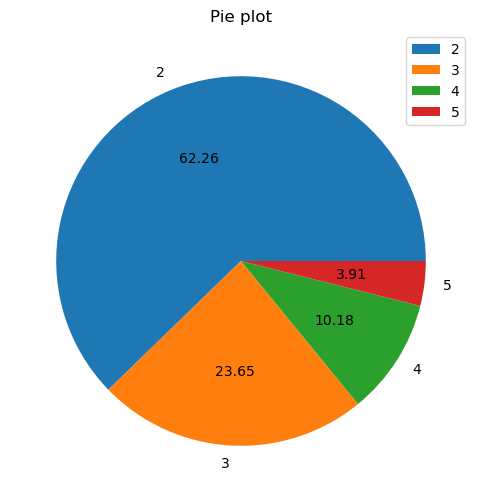

In [51]:
plt.figure(figsize=(6,6))
v=[2,3,4,5]
plt.pie(hyd_prop['BHK'].value_counts(),autopct='%.2f',labels=v)
plt.title('Pie plot')
plt.legend()
plt.show()

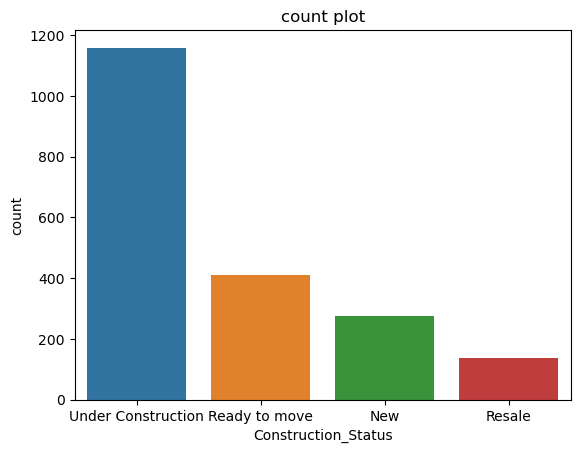

In [52]:
sns.countplot(data=data_copy,x="Construction_Status")
plt.title("count plot")
plt.show()

Observation :
 maximaum number of flats are Under Construction
 New and resale properties are few

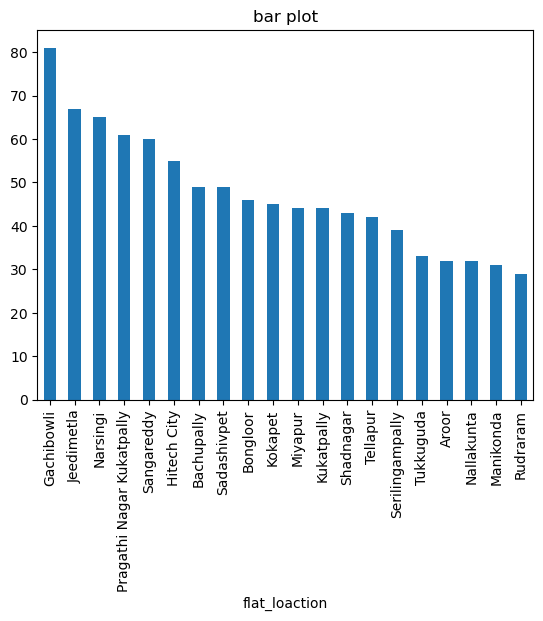

In [53]:
plt.xlabel('flat_loaction')
hyd_prop['Location'].value_counts()[:20].plot(kind='bar')
plt.title('bar plot')

plt.show()

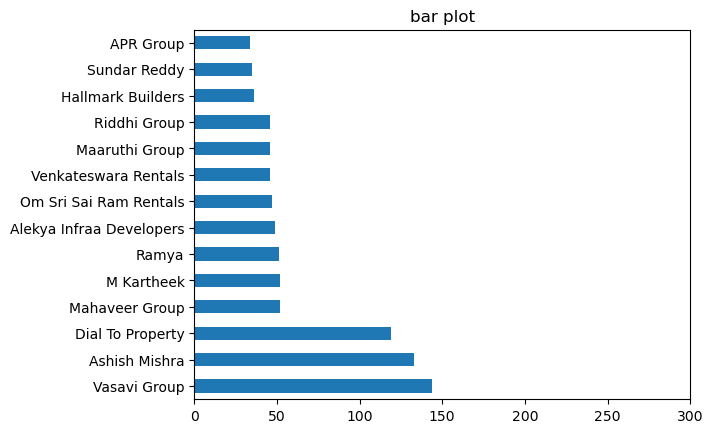

In [54]:
plt.xlabel('Count')
hyd_prop['Builder'].value_counts()[1:15].plot(kind='barh')
plt.xlim([0,300])
plt.title('bar plot')
plt.show()

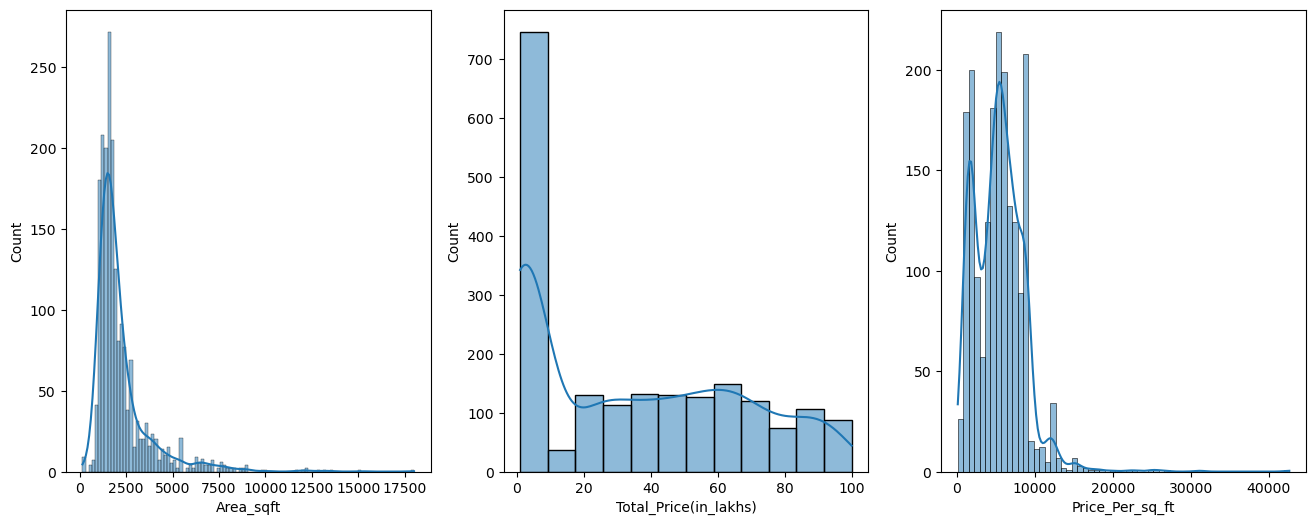

In [55]:
fig,axs=plt.subplots(figsize=(16,6),ncols=3)
sns.histplot(x='Area_sqft',data=hyd_prop,kde=True,ax=axs[0])
sns.histplot(x='Total_Price(in_lakhs)',data=hyd_prop,kde=True,ax=axs[1])
sns.histplot(x='Price_Per_sq_ft',data=hyd_prop,kde=True,ax=axs[2])
plt.show()

In [56]:
hyd_prop.pivot_table(hyd_prop,index=['BHK','Construction_Status'])

C:\Users\dell\AppData\Local\Temp\ipykernel_11124\2251395684.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  hyd_prop.pivot_table(hyd_prop,index=['BHK','Construction_Status'])


Area_sqft  Price_Per_sq_ft  Total_Price(in_lakhs)
BHK Construction_Status                                                     
2   Ready to move        1170.949219      5904.109375              56.209492
    Under Construction   1236.044118      5128.833333              60.403382
3   New                  2261.666667      2582.591837              35.921429
    Ready to move        1841.880000      7109.635556              33.931467
    Resale               2597.873333      2265.426667              30.844867
    Under Construction   1901.815190      6480.260759              28.662329
4   Ready to move        3486.705128      8348.448718               5.000769
    Under Construction   3905.216667      8857.791667               7.039833
5   Ready to move        6436.243902     10143.756098               6.216829
    Under Construction   5991.714286      7714.485714               4.696857

# Bi-Variate

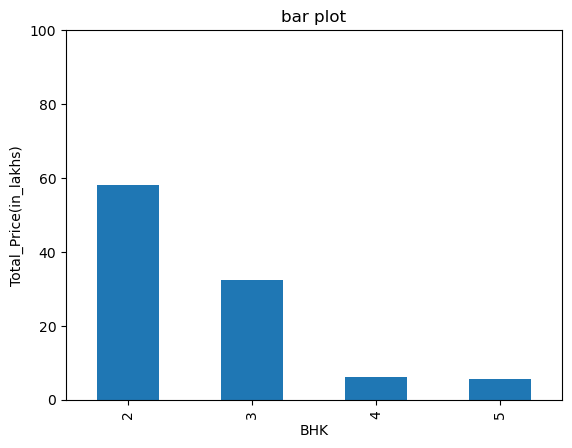

In [57]:
plt.ylabel('Total_Price(in_lakhs)')
hyd_prop.groupby(by='BHK')['Total_Price(in_lakhs)'].mean().plot(kind='bar')
plt.ylim([0,100])
plt.title('bar plot')
plt.show()

In [58]:
z=hyd_prop.select_dtypes(include='number').columns
z

Index(['BHK', 'Area_sqft', 'Price_Per_sq_ft', 'Total_Price(in_lakhs)'], dtype='object')

In [59]:
num_col=z.drop(['BHK']).tolist()
num_col

['Area_sqft', 'Price_Per_sq_ft', 'Total_Price(in_lakhs)']

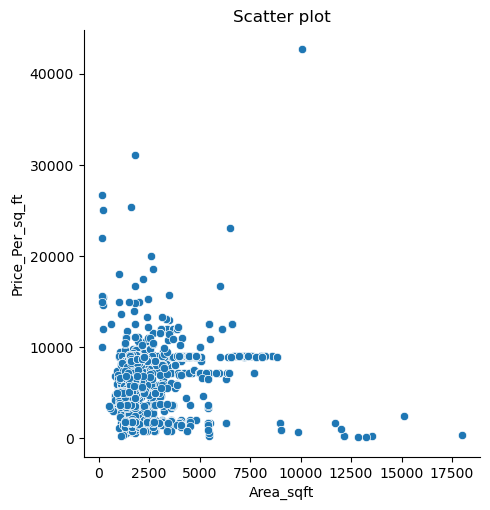

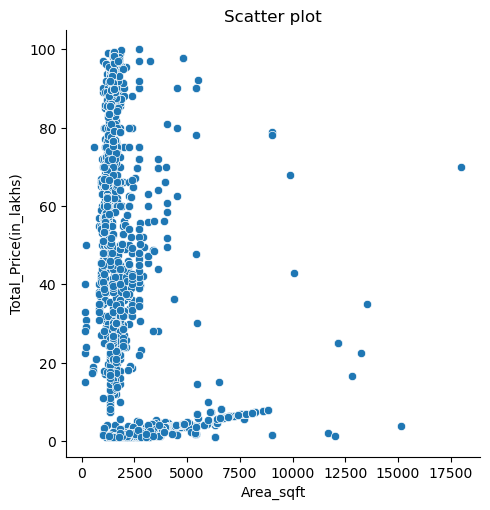

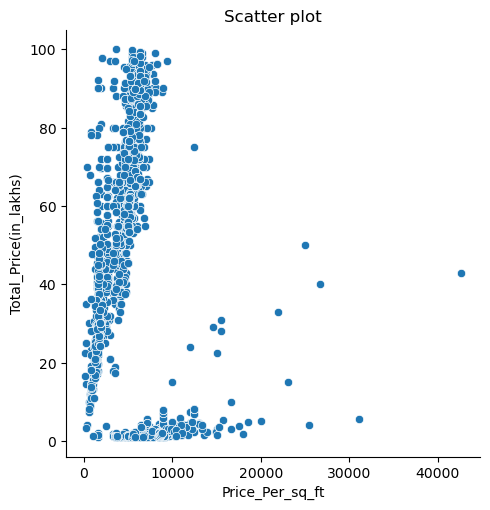

In [60]:
for col1 in range(len(num_col)):
    for col2 in range(col1+1,len(num_col)):
          sns.relplot(x=hyd_prop[num_col[col1]],y=hyd_prop[num_col[col2]],dashes=True)
          plt.title('Scatter plot')
          plt.show()

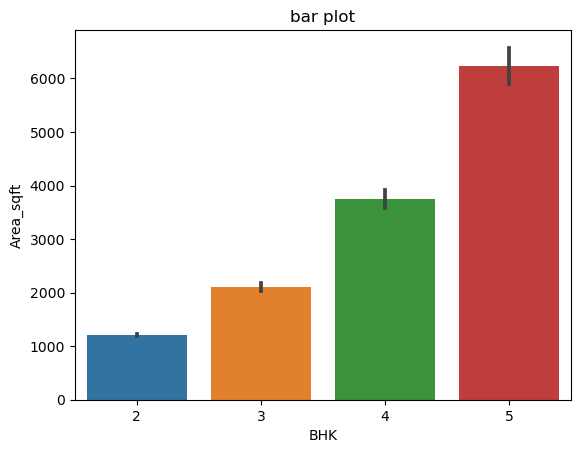

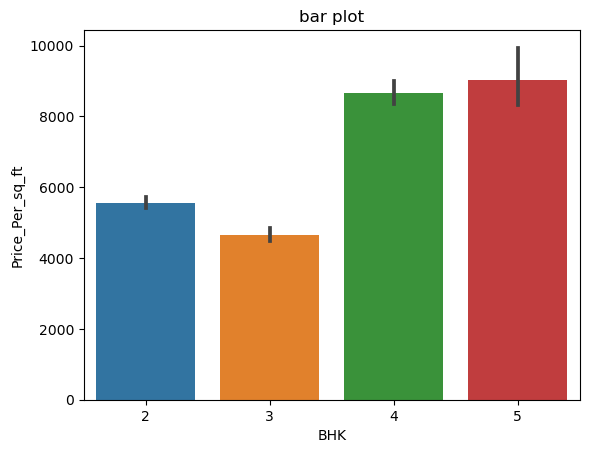

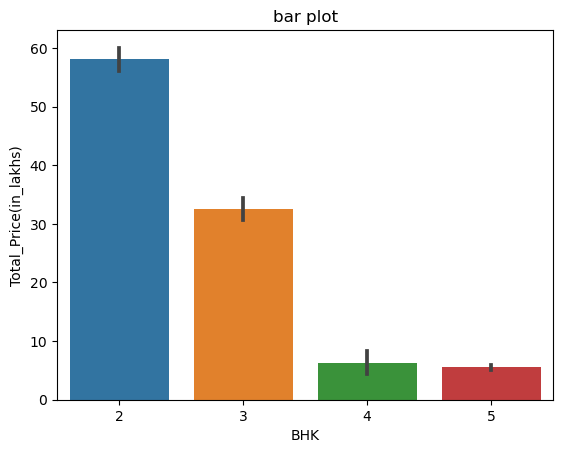

In [61]:
for j in range(len(num_col)):
    sns.barplot(x='BHK',y=hyd_prop[num_col[j]],data=hyd_prop)  
    plt.title('bar plot')
    plt.show()
    

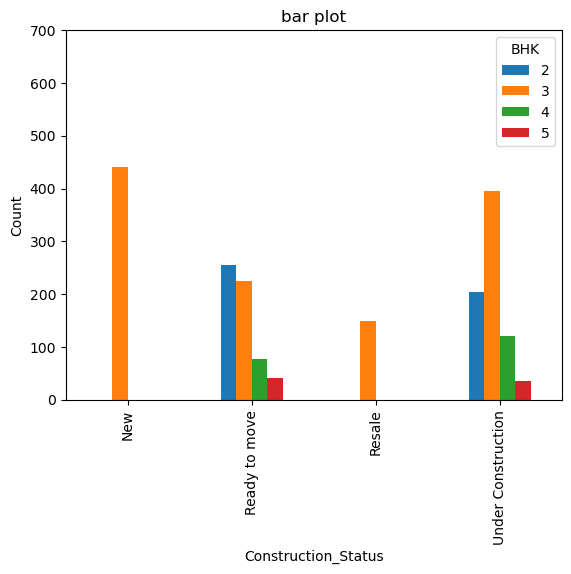

In [62]:
pd.crosstab(hyd_prop['Construction_Status'],hyd_prop['BHK']).plot(kind='bar')
plt.title('bar plot')
plt.ylabel('Count')
plt.ylim([0,700])
plt.show()


# Multi-Variate

C:\Users\dell\AppData\Local\Temp\ipykernel_11124\1987919955.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hyd_prop.corr(),vmin=-1,vmax=1,annot=True,cmap='mako')


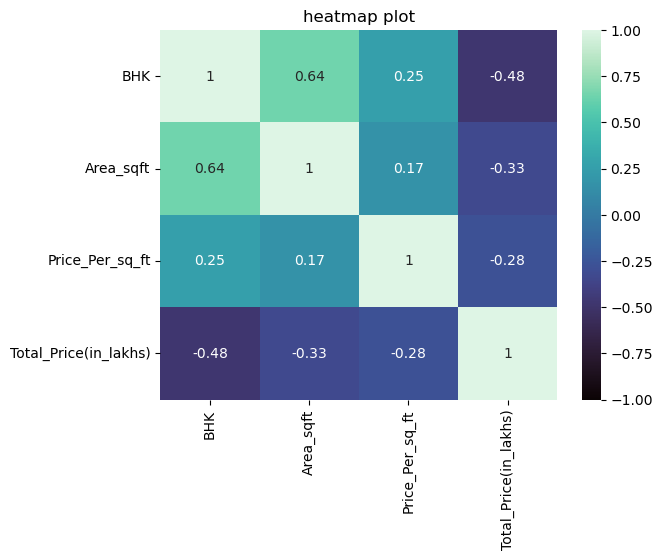

In [63]:
sns.heatmap(hyd_prop.corr(),vmin=-1,vmax=1,annot=True,cmap='mako')
plt.title('heatmap plot')
plt.show()

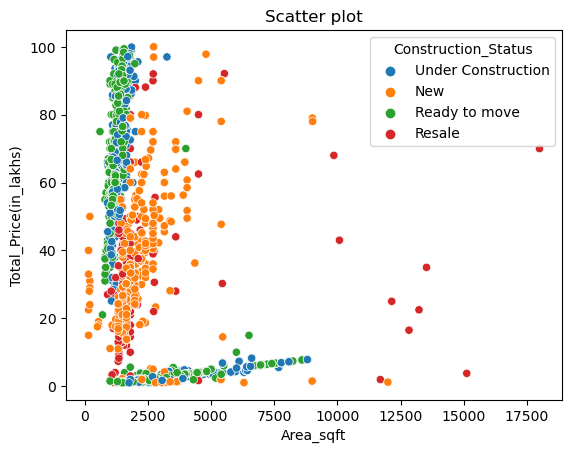

In [64]:
sns.scatterplot(data=hyd_prop,x="Area_sqft",y="Total_Price(in_lakhs)",hue="Construction_Status")
plt.title('Scatter plot')
plt.show()

In [65]:
hyd_prop.groupby(by=['BHK','Construction_Status'])['Total_Price(in_lakhs)'].min()

BHK  Construction_Status
2    Ready to move          1.02
     Under Construction     1.10
3    New                    1.02
     Ready to move          1.00
     Resale                 1.05
     Under Construction     1.00
4    Ready to move          1.20
     Under Construction     1.10
5    Ready to move          1.90
     Under Construction     1.20
Name: Total_Price(in_lakhs), dtype: float64

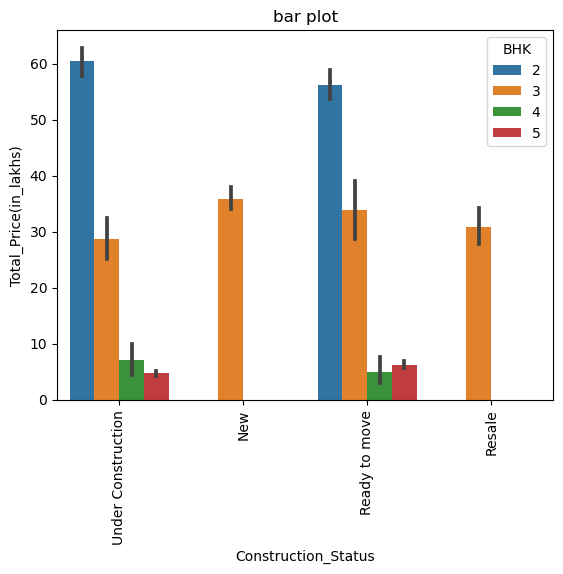

In [66]:
plt.xticks(rotation=90)
sns.barplot(x='Construction_Status',y='Total_Price(in_lakhs)',hue='BHK',data=hyd_prop)
plt.title('bar plot')
plt.show()

In [ ]:
construction_status=(input("Enter the construction status (New , Resale , Ready to move , Under Construction) : "))
minimum_price=float(input("Enter the minimum Total_Price(in lakhs) : "))
miximum_price=float(input("Enter the  Total_Price(in lakhs) : "))
hyd_flats[(hyd_flats['Construction_Status']==construction_status) & (hyd_flats['Total_Price(in_lakhs)']>=minimum_price) & (hyd_flats['Total_Price(in_lakhs)']<=miximum_price)].head(10)



# Conclusion